# Run 1 Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

In [2]:
plotly.tools.set_credentials_file(username='cbethin', api_key='sN3HNRCSQ80RuQVknFTh')

In [3]:
packet_data = pd.read_csv('run1.csv')
packet_data[['No.', 'Time', 'Length', 'Info']].head()

,No.,Time,Length,Info
0,19,98.841477,344,DHCP Offer - Transaction ID 0xed87a82f
1,90,103.943881,344,DHCP ACK - Transaction ID 0xed87a82f
2,105,104.288231,195,Standard query response 0x8e45 A cdn.samsungcl...
3,107,104.308012,195,Standard query response 0x0241 A cdn.samsungcl...
4,109,104.355827,74,"80 > 58767 [SYN, ACK] Seq=0 Ack=1 Win=28960 ..."


In [4]:
def filterTime(data, timeStart=0, timeEnd=1):
    return data[data.apply(lambda x: x['Time'] > timeStart and x['Time'] < timeEnd, axis=1)]

In [15]:
packet_data['Info'][0].split(']')
retransmission_packets = packet_data[packet_data.apply(lambda x: x['Info'].split(']')[0] == "[TCP Retransmission", axis=1)]

In [34]:
def containsRST(x):
    if len(x['Info'].split('[')) > 1:
        if len(x['Info'].split('[')[1].split(']')) > 0:
            return x['Info'].split('[')[1].split(']')[0] == "RST"
    
    return False

rst_packets = packet_data[packet_data.apply(lambda x: containsRST(x), axis=1)]

In [146]:
def showPlot(packet_data, retransmission_packet_data=[], rst_packet_data=[], timeLimit=[None, None], title='Packet Length over Time'):
    if timeLimit != [None, None]:
        packet_data = filterTime(packet_data, timeLimit[0], timeLimit[1])
        if not retransmission_packet_data.empty:
            retransmission_packet_data = filterTime(retransmission_packet_data, timeLimit[0], timeLimit[1])
        if not rst_packet_data.empty:
            rst_packet_data = filterTime(rst_packet_data, timeLimit[0], timeLimit[1])

    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(packet_data['Time'], packet_data['Length'], color='lightblue', label='All Packets')
    ax.scatter(retransmission_packet_data['Time'], retransmission_packet_data['Length'], color='orange', label='Retrasmissions')
    ax.scatter(rst_packet_data['Time'], rst_packet_data['Length'], color='black', label='Reset Packets')
    ax.set_title(title, fontdict={'fontsize': 16})
    ax.set_xlabel('Time', fontdict={'fontsize': 12})
    ax.legend(loc='upper left')
    ax.set_ylabel('Packet Size (bytes)', fontdict={'fontsize': 12})

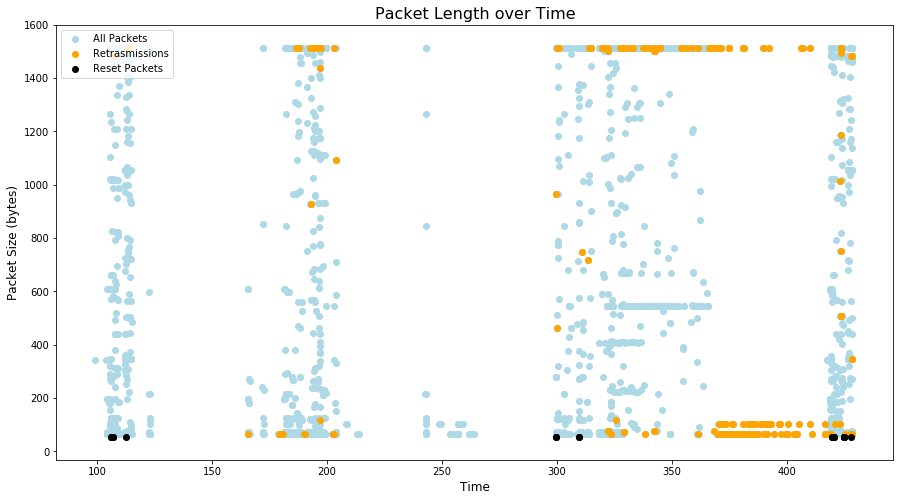

In [147]:
showPlot(packet_data, retransmission_packets, rst_packets)

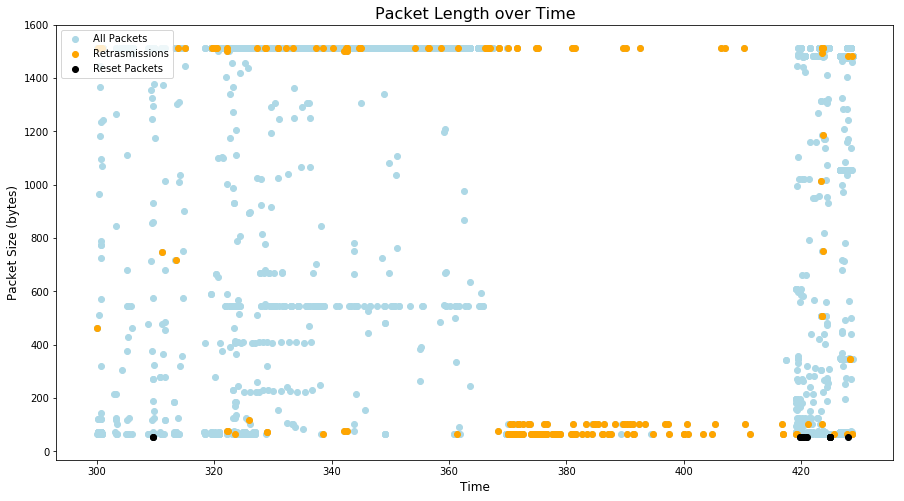

In [148]:
showPlot(packet_data, retransmission_packets, rst_packets, timeLimit=(300, 500))

# Run 2 Analytics

In [139]:
packet_data2 = pd.read_csv('run2.csv')
packet_data2 = packet_data2[packet_data2.apply(lambda x:  x['Destination']=='192.168.137.169', axis=1)]
packet_data2.head()

,No.,Time,Source,Destination,Protocol,Length,Info
14,15,6.085980,54.85.123.94,192.168.137.169,TLSv1,103,Encrypted Alert
15,16,22.221719,54.85.123.94,192.168.137.169,TCP,103,"[TCP Retransmission] 443 > 33594 [FIN, PSH, ..."
16,17,32.802113,54.209.179.129,192.168.137.169,TLSv1,103,Encrypted Alert
17,18,32.806673,54.209.179.129,192.168.137.169,TLSv1,103,Encrypted Alert
18,19,33.010017,54.209.179.129,192.168.137.169,TCP,103,"[TCP Retransmission] 443 > 56668 [PSH, ACK] ..."


In [141]:
retransmission_packets2 = packet_data2[packet_data2.apply(lambda x: x['Info'].split(']')[0] == "[TCP Retransmission", axis=1)]
rst_packets2 = packet_data2[packet_data2.apply(lambda x: containsRST(x), axis=1)]

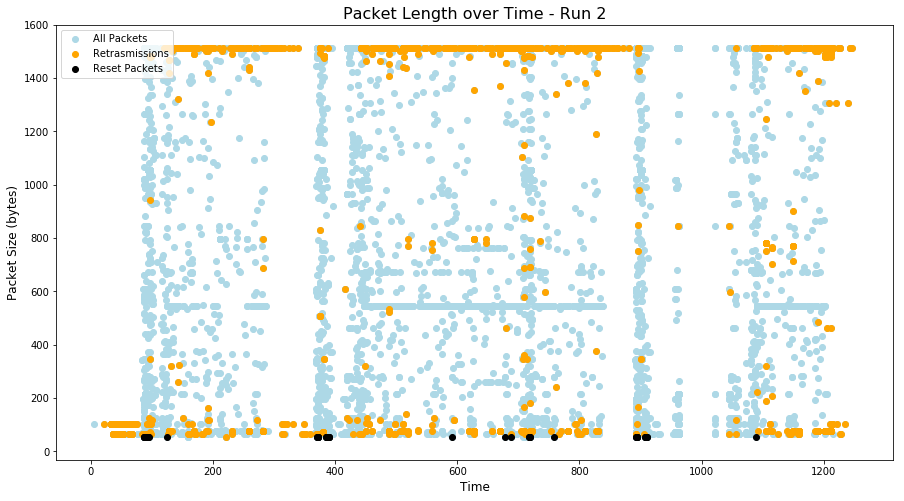

In [149]:
showPlot(packet_data2, retransmission_packets2, rst_packets2, title='Packet Length over Time - Run 2')

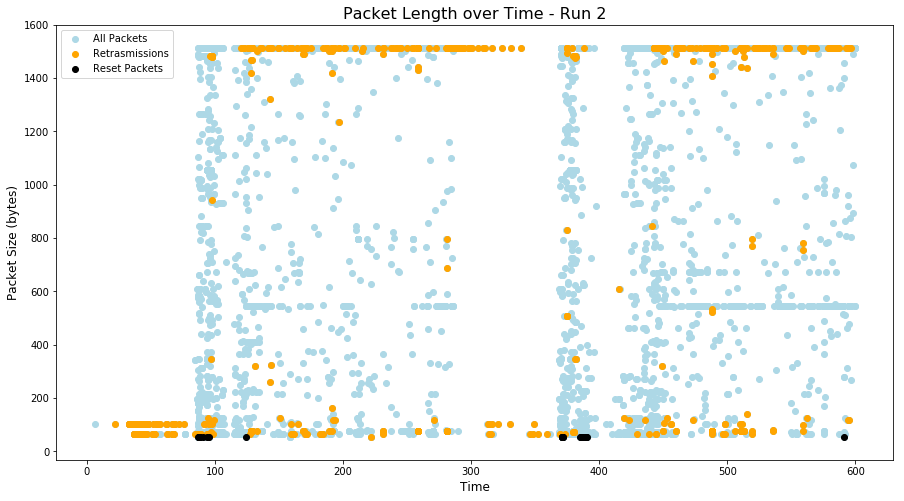

In [152]:
showPlot(packet_data2, retransmission_packets2, rst_packets2, timeLimit=(0, 600), title='Packet Length over Time - Run 2')